In [1]:
from datasets import SHD_dataloaders, SSC_dataloaders
from config import Config
from ann import ANN
from snn_delays import SnnDelays
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\n===> Device = {device}")

config = Config()

model = SnnDelays(config).to(device)


===> Device = cpu


In [2]:
train_loader, valid_loader, test_loader = SHD_dataloaders(config)

The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_25] already exists.
The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_25] already exists.


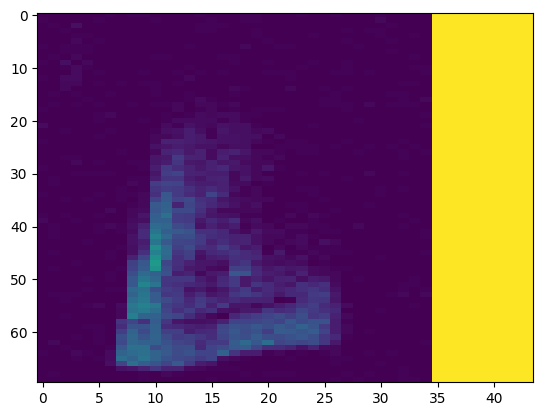

In [20]:
import matplotlib.pyplot as plt
from datasets import Augs

augmentations = Augs(config)

for i, (x, y, _) in enumerate(train_loader):
    x = augmentations(x)
    plt.imshow(x[0].T, aspect='auto')
    break

In [2]:
train_loader, valid_loader, test_loader = SHD_dataloaders(config)
model.train_model(train_loader, valid_loader, test_loader, device)

The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_25] already exists.
The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_25] already exists.
torch.Size([38, 70])
torch.Size([38, 70])
torch.Size([38, 70])
torch.Size([38, 70])
torch.Size([38, 70])
torch.Size([38, 70])
torch.Size([38, 70])
torch.Size([38, 70])
torch.Size([38, 70])
torch.Size([38, 70])
torch.Size([38, 70])
torch.Size([38, 70])
torc

AttributeError: 'NoneType' object has no attribute 'permute'

In [ ]:
train_loader, valid_loader, test_loader = SHD_dataloaders(config)
model.fine_tune(train_loader, valid_loader, test_loader, device)

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_25] already exists.
The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_25] already exists.


wandb: Currently logged in as: thvnvtos. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/thanatos/.netrc


=====> Epoch 0 : 
Loss Train = 1.637  |  Best Acc Train = 49.30% 
Loss Valid = 0.307  |  Best Acc Valid = 93.87%
Loss test = 46.05 | acc test = 87.63
# Saving best model...
=====> Epoch 1 : 
Loss Train = 1.638  |  Best Acc Train = 49.65% 
Loss Valid = 0.308  |  Best Acc Valid = 93.93%
Loss test = 46.41 | acc test = 87.54
=====> Epoch 2 : 
Loss Train = 1.582  |  Best Acc Train = 50.60% 
Loss Valid = 0.317  |  Best Acc Valid = 93.72%
Loss test = 46.42 | acc test = 87.18
=====> Epoch 3 : 
Loss Train = 1.549  |  Best Acc Train = 51.60% 
Loss Valid = 0.322  |  Best Acc Valid = 93.71%
Loss test = 46.92 | acc test = 87.45
=====> Epoch 4 : 
Loss Train = 1.530  |  Best Acc Train = 51.89% 
Loss Valid = 0.327  |  Best Acc Valid = 93.34%
Loss test = 46.50 | acc test = 87.17
=====> Epoch 5 : 
Loss Train = 1.501  |  Best Acc Train = 53.36% 
Loss Valid = 0.327  |  Best Acc Valid = 92.88%
Loss test = 46.17 | acc test = 87.51
=====> Epoch 6 : 
Loss Train = 1.532  |  Best Acc Train = 52.34% 
Loss Valid 

Epoch,▁▂▃▃▄▅▆▆▇█
acc_test,█▇▃▆▃▇▇▁▇▆
acc_train,▁▂▃▅▅█▆▆▅▆
acc_valid,██▇▇▄▁▃▃▂▁
loss_test,▁▄▄█▅▂▃▇▆▁
loss_train,██▅▃▃▁▃▂▃▁
loss_valid,▁▁▄▅▇▇▇█▆▇
lr_pos,▁▁▁▁▁▁▁▁▁▁
lr_w,▅██▇▅▄▂▁▁▁
sigma,▁▁▁▁▁▁▁▁▁▁
tau_m_0,▁▁▁▁▁▁▁▁▁▁
